### Приложение 3
#### Криптоанализ алгоритма RSA

In [1]:
# Сначала очистим директорию от артифактов предыдущих запусков кода

!rm -f encrypted.* decrypted.* *.public *.secret
!ls -l

total 2044
-rw-r--r-- 1 evgeny evgeny 432370 Apr 29 10:47 analyze.ipynb
-rw-r--r-- 1 evgeny evgeny 635921 Apr 29 10:40 analyze.pdf
-rw-r--r-- 1 evgeny evgeny 112888 Apr 29 10:44 bbyoda.jpeg
-rw-r--r-- 1 evgeny evgeny  89067 Apr 29 10:30 demo.ipynb
-rw-r--r-- 1 evgeny evgeny 317847 Apr 29 10:32 demo.pdf
-rw-r--r-- 1 evgeny evgeny  35117 Apr 23 16:57 image.png
-rw-r--r-- 1 evgeny evgeny   4172 Apr 26 17:00 keygen.py
-rw-r--r-- 1 evgeny evgeny  24721 Apr 29 10:25 manual.ipynb
-rw-r--r-- 1 evgeny evgeny 399380 Apr 29 10:27 manual.pdf
-rw-r--r-- 1 evgeny evgeny    408 Apr 20 15:36 open.txt
drwxr-xr-x 2 evgeny evgeny   4096 Apr 26 17:09 __pycache__
-rw-r--r-- 1 evgeny evgeny   5100 Apr 25 19:02 rsa.py
drwxr-xr-x 6 evgeny evgeny   4096 Apr 15 15:18 venv


In [2]:
# Сгенерирую игрушечный пример - пару ключей с префиксом small

from keygen import KeyGenerator

KeyGenerator(8, 8, "small")

# Проверим создались ли файлы с ключами
!ls -l

total 2052
-rw-r--r-- 1 evgeny evgeny 432370 Apr 29 10:47 analyze.ipynb
-rw-r--r-- 1 evgeny evgeny 635921 Apr 29 10:40 analyze.pdf
-rw-r--r-- 1 evgeny evgeny 112888 Apr 29 10:44 bbyoda.jpeg
-rw-r--r-- 1 evgeny evgeny  89067 Apr 29 10:30 demo.ipynb
-rw-r--r-- 1 evgeny evgeny 317847 Apr 29 10:32 demo.pdf
-rw-r--r-- 1 evgeny evgeny  35117 Apr 23 16:57 image.png
-rw-r--r-- 1 evgeny evgeny   4172 Apr 26 17:00 keygen.py
-rw-r--r-- 1 evgeny evgeny  24721 Apr 29 10:25 manual.ipynb
-rw-r--r-- 1 evgeny evgeny 399380 Apr 29 10:27 manual.pdf
-rw-r--r-- 1 evgeny evgeny    408 Apr 20 15:36 open.txt
drwxr-xr-x 2 evgeny evgeny   4096 Apr 26 17:09 __pycache__
-rw-r--r-- 1 evgeny evgeny   5100 Apr 25 19:02 rsa.py
-rw-r--r-- 1 evgeny evgeny     11 Apr 29 10:49 small.public
-rw-r--r-- 1 evgeny evgeny     13 Apr 29 10:49 small.secret
drwxr-xr-x 6 evgeny evgeny   4096 Apr 15 15:18 venv


In [3]:
# Вижу два ключа small.public и small.secret
# Измерю их длину и длину модуля

# Открытый ключ имеет длину 8 бит

with open("small.public", "r") as file:
    public_key, modul = file.read().split("/")

print({
    "public_key": public_key,
    "public_key_int": int(public_key, 0),
    "public_key_bin": bin(int(public_key, 0)),
    "public_key_len": len(bin(int(public_key, 0))[2:])
})

{'public_key': '0XBF', 'public_key_int': 191, 'public_key_bin': '0b10111111', 'public_key_len': 8}


In [4]:
# Закрытый ключ имеет длину 14 бит

with open("small.secret", "r") as file:
    secret_key = file.read().split("/")[0]
    
print({
    "secret_key": secret_key,
    "secret_key_int": int(secret_key, 0),
    "secret_key_bin": bin(int(secret_key, 0)),
    "secret_key_len": len(bin(int(secret_key, 0))[2:])
})

{'secret_key': '0X20DB', 'secret_key_int': 8411, 'secret_key_bin': '0b10000011011011', 'secret_key_len': 14}


In [5]:
# Модуль - 16 бит

print({
    "modul": modul,
    "modul_int": int(modul, 0),
    "modul_bin": bin(int(modul, 0)),
    "modul_len": len(bin(int(modul, 0))[2:])
})

{'modul': '0X8CF9', 'modul_int': 36089, 'modul_bin': '0b1000110011111001', 'modul_len': 16}


In [6]:
# Ключи большой блины с правильными параметрами взломать
# за вменяемое время невозможно.
# Буду демонстрировать попытку взлома RSA малой длины и 
# не верными параметрами p и q (с малой разницей)
# 
# Параметры p и q рекомендуется подбирать так чтобы их разница 
# - тоже была большим числом. Близкие по значению параметры p 
# и q облегчили бы криптоанализ - поскольку уменьшили бы 
# количество вариантов для перебора.

# Например:
# 
# Зная длину модуля алгоритма n (16 бит) я могу предполагать что
# это значение появилось в результате перемножения неких p * q
# значения которые (грубо) могли варьироваться от 2^1 до 2^16
# отсюда следует что для факторизации числа n нужно было бы 
# перебрать все значения попадающие в этот диапазон, то есть всего:

print(2**16 - 2**1)


65534


In [7]:
# А если параметры выбраны не верно и предположим оба числа p, q
# имеют длину 8, то диапазон перебора сужается до следующего 
# от 2^7 до 2^8-1, то есть

print(2**8-2**7)

128


In [8]:
# То есть задача облегчилась примерно в 512 раз

# С увеличением разрядности ключей, разница в количестве
# вариантов перебора в случае с правильными и не правильными
# параметрами p,q пропорционально возрастает

print(65534 / 128)

511.984375


In [9]:
# При генерации пары ключей small в классе KeyGenerator 
# я указал параметры 8 и 8. Они означают как раз длину 
# параметров p, q

# Предположим, что злоумышленник видит длину модуля 16
# и рассчитывая что выбраны близкие параметры p, q перебирает 
# только значения с длиной 8

modul_int = int(modul, 0)
p = None

for i in range(2**7, 2**8):
    if modul_int % i == 0:
        p = i

In [10]:
# Получили p и q
q = int(modul_int / p)

print("p = ", p)
print("q = ", q)

p =  239
q =  151


In [11]:
# Отсюда находим функцию Эйлера

phi = (p - 1)*(q - 1)
phi

35700

In [12]:
# А теперь вычисляем и секретный ключ

public_key_int = int(public_key, 0)
secret_key = pow(public_key_int, -1, phi)
secret_key

8411

In [13]:
# Проверяем правильно ли найден секретный ключ

import random 

random_int = random.randrange(2, 1024)
random_int_encrypted = pow(random_int, public_key_int, modul_int)
random_int_decrypted = pow(random_int_encrypted, secret_key, modul_int)

bool(random_int == random_int_decrypted)

True

In [14]:
# Сохраним взломанный ключ в отдельный файл secret.crack
# в формате который принимает программа, то есть в 16м формате 
# и с разделеием знаком /

with open("secret.crack", "w") as file:
    text = "{}/{}".format(hex(secret_key), hex(modul_int))
    file.write(text)

!ls -l

total 2056
-rw-r--r-- 1 evgeny evgeny 432370 Apr 29 10:47 analyze.ipynb
-rw-r--r-- 1 evgeny evgeny 635921 Apr 29 10:40 analyze.pdf
-rw-r--r-- 1 evgeny evgeny 112888 Apr 29 10:44 bbyoda.jpeg
-rw-r--r-- 1 evgeny evgeny  89067 Apr 29 10:30 demo.ipynb
-rw-r--r-- 1 evgeny evgeny 317847 Apr 29 10:32 demo.pdf
-rw-r--r-- 1 evgeny evgeny  35117 Apr 23 16:57 image.png
-rw-r--r-- 1 evgeny evgeny   4172 Apr 26 17:00 keygen.py
-rw-r--r-- 1 evgeny evgeny  24721 Apr 29 10:25 manual.ipynb
-rw-r--r-- 1 evgeny evgeny 399380 Apr 29 10:27 manual.pdf
-rw-r--r-- 1 evgeny evgeny    408 Apr 20 15:36 open.txt
drwxr-xr-x 2 evgeny evgeny   4096 Apr 26 17:09 __pycache__
-rw-r--r-- 1 evgeny evgeny   5100 Apr 25 19:02 rsa.py
-rw-r--r-- 1 evgeny evgeny     13 Apr 29 10:49 secret.crack
-rw-r--r-- 1 evgeny evgeny     11 Apr 29 10:49 small.public
-rw-r--r-- 1 evgeny evgeny     13 Apr 29 10:49 small.secret
drwxr-xr-x 6 evgeny evgeny   4096 Apr 15 15:18 venv


In [15]:
# Ради приличий давайте что-то зашифруем и расшифруем этими ключами
# Ну вот например картинку bbyoda.jpeg

!ls -l

total 2056
-rw-r--r-- 1 evgeny evgeny 432370 Apr 29 10:47 analyze.ipynb
-rw-r--r-- 1 evgeny evgeny 635921 Apr 29 10:40 analyze.pdf
-rw-r--r-- 1 evgeny evgeny 112888 Apr 29 10:44 bbyoda.jpeg
-rw-r--r-- 1 evgeny evgeny  89067 Apr 29 10:30 demo.ipynb
-rw-r--r-- 1 evgeny evgeny 317847 Apr 29 10:32 demo.pdf
-rw-r--r-- 1 evgeny evgeny  35117 Apr 23 16:57 image.png
-rw-r--r-- 1 evgeny evgeny   4172 Apr 26 17:00 keygen.py
-rw-r--r-- 1 evgeny evgeny  24721 Apr 29 10:25 manual.ipynb
-rw-r--r-- 1 evgeny evgeny 399380 Apr 29 10:27 manual.pdf
-rw-r--r-- 1 evgeny evgeny    408 Apr 20 15:36 open.txt
drwxr-xr-x 2 evgeny evgeny   4096 Apr 26 17:09 __pycache__
-rw-r--r-- 1 evgeny evgeny   5100 Apr 25 19:02 rsa.py
-rw-r--r-- 1 evgeny evgeny     13 Apr 29 10:49 secret.crack
-rw-r--r-- 1 evgeny evgeny     11 Apr 29 10:49 small.public
-rw-r--r-- 1 evgeny evgeny     13 Apr 29 10:49 small.secret
drwxr-xr-x 6 evgeny evgeny   4096 Apr 15 15:18 venv


In [16]:
# Импортируем класс RSA и передаем ему наш игрушечный ключ
# Затем шифруем изображение и сохраняем в отдельный файл bbyoda_encrypted.jpeg

from rsa import RSA

encryptor = RSA(public_key_path="small.public")
encryptor.encrypt("bbyoda.jpeg", "bbyoda_encrypted.jpeg")
!ls -l

total 2176
-rw-r--r-- 1 evgeny evgeny 432370 Apr 29 10:47 analyze.ipynb
-rw-r--r-- 1 evgeny evgeny 635921 Apr 29 10:40 analyze.pdf
-rw-r--r-- 1 evgeny evgeny 120414 Apr 29 10:49 bbyoda_encrypted.jpeg
-rw-r--r-- 1 evgeny evgeny 112888 Apr 29 10:44 bbyoda.jpeg
-rw-r--r-- 1 evgeny evgeny  89067 Apr 29 10:30 demo.ipynb
-rw-r--r-- 1 evgeny evgeny 317847 Apr 29 10:32 demo.pdf
-rw-r--r-- 1 evgeny evgeny  35117 Apr 23 16:57 image.png
-rw-r--r-- 1 evgeny evgeny   4172 Apr 26 17:00 keygen.py
-rw-r--r-- 1 evgeny evgeny  24721 Apr 29 10:25 manual.ipynb
-rw-r--r-- 1 evgeny evgeny 399380 Apr 29 10:27 manual.pdf
-rw-r--r-- 1 evgeny evgeny    408 Apr 20 15:36 open.txt
drwxr-xr-x 2 evgeny evgeny   4096 Apr 26 17:09 __pycache__
-rw-r--r-- 1 evgeny evgeny   5100 Apr 25 19:02 rsa.py
-rw-r--r-- 1 evgeny evgeny     13 Apr 29 10:49 secret.crack
-rw-r--r-- 1 evgeny evgeny     11 Apr 29 10:49 small.public
-rw-r--r-- 1 evgeny evgeny     13 Apr 29 10:49 small.secret
drwxr-xr-x 6 evgeny evgeny   4096 Apr 15 15:18

In [17]:
# Создам отдельный объект для дешифрации и передам ему взломанный ключ
# в файле secret.crack

decryptor = RSA(secret_key_path="secret.crack")
decryptor.decrypt("bbyoda_encrypted.jpeg", "bbyoda_decrypted.jpeg")
!ls -l

total 2288
-rw-r--r-- 1 evgeny evgeny 432370 Apr 29 10:47 analyze.ipynb
-rw-r--r-- 1 evgeny evgeny 635921 Apr 29 10:40 analyze.pdf
-rw-r--r-- 1 evgeny evgeny 112888 Apr 29 10:49 bbyoda_decrypted.jpeg
-rw-r--r-- 1 evgeny evgeny 120414 Apr 29 10:49 bbyoda_encrypted.jpeg
-rw-r--r-- 1 evgeny evgeny 112888 Apr 29 10:44 bbyoda.jpeg
-rw-r--r-- 1 evgeny evgeny  89067 Apr 29 10:30 demo.ipynb
-rw-r--r-- 1 evgeny evgeny 317847 Apr 29 10:32 demo.pdf
-rw-r--r-- 1 evgeny evgeny  35117 Apr 23 16:57 image.png
-rw-r--r-- 1 evgeny evgeny   4172 Apr 26 17:00 keygen.py
-rw-r--r-- 1 evgeny evgeny  24721 Apr 29 10:25 manual.ipynb
-rw-r--r-- 1 evgeny evgeny 399380 Apr 29 10:27 manual.pdf
-rw-r--r-- 1 evgeny evgeny    408 Apr 20 15:36 open.txt
drwxr-xr-x 2 evgeny evgeny   4096 Apr 26 17:09 __pycache__
-rw-r--r-- 1 evgeny evgeny   5100 Apr 25 19:02 rsa.py
-rw-r--r-- 1 evgeny evgeny     13 Apr 29 10:49 secret.crack
-rw-r--r-- 1 evgeny evgeny     11 Apr 29 10:49 small.public
-rw-r--r-- 1 evgeny evgeny     13 Apr

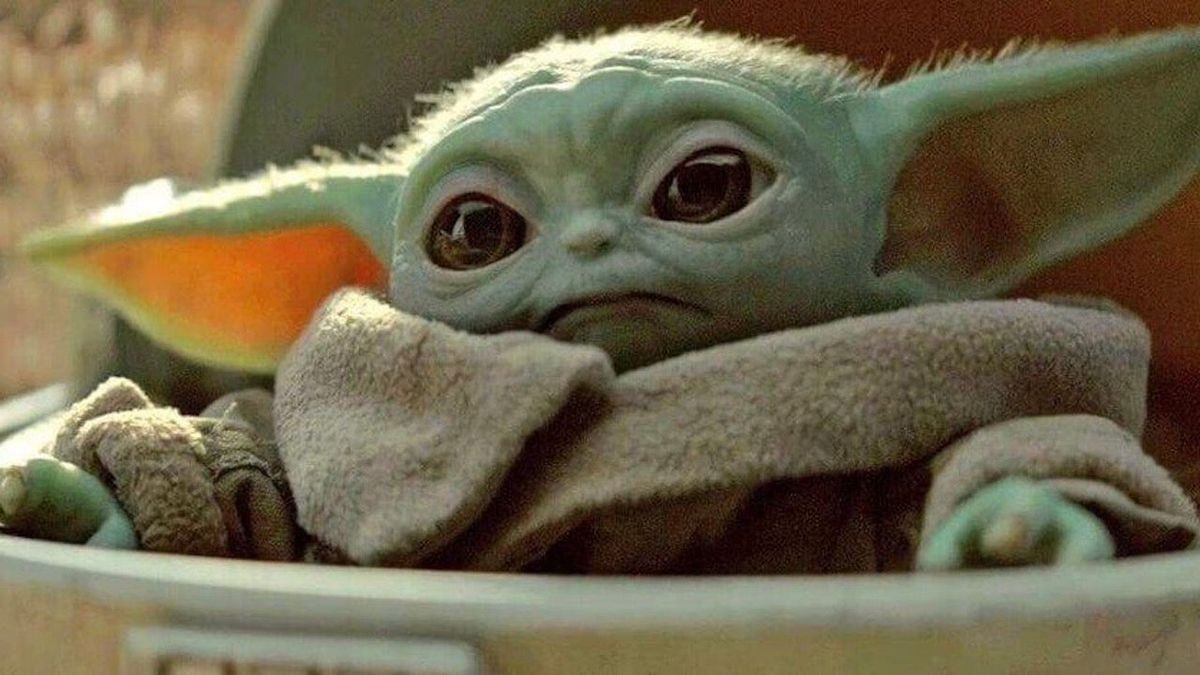

In [18]:
from PIL import Image

Image.open("bbyoda_decrypted.jpeg")

### Cпасибо за внимание и с наступающими вас майскими праздниками!
#### And May 4th be with you 